[0.5 0.5]


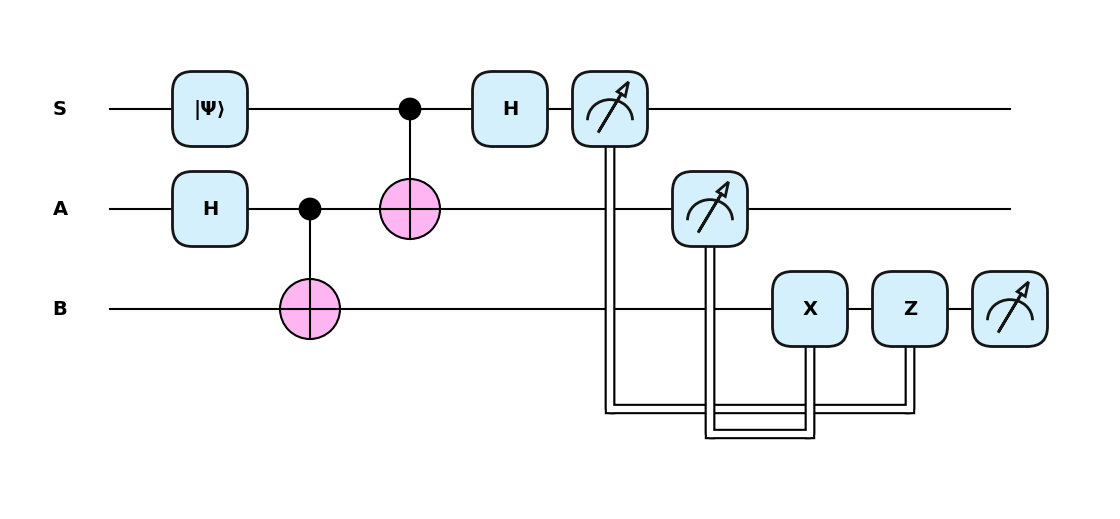

In [20]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=["S","A","B"])
@qml.qnode(dev)
def teleport(state):
    qml.StatePrep(state, wires=["S"])
    
    qml.Hadamard(wires="A")
    qml.CNOT(wires=["A", "B"])
    
    qml.CNOT(wires=["S", "A"])
    qml.Hadamard(wires="S")
    
    m0 = qml.measure("S")
    m1 = qml.measure("A")
    
    qml.cond(m1, qml.PauliX)("B")
    qml.cond(m0, qml.PauliZ)("B")
    return qml.probs(wires=["B"])

state = np.array([np.sqrt(0.5), np.sqrt(0.5)])
print(teleport(state))
_ = qml.draw_mpl(teleport, style="pennylane")(state)